In [1]:
# Final Project Code
# IST 718 Big Data Analytics

# Team 3
# Melissa Maverick, Nick Waine, Josh Biggs-Bauer, Noe Fernandes

# LOAD IN THE LIBRARIES

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tqdm.notebook import tqdm
from datetime import datetime
from PIL import Image

import os
print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("seaborn version: {}".format(sns.__version__))

pandas version: 1.3.4
numpy version: 1.21.2
seaborn version: 0.11.2


In [2]:
os.getcwd()

'/Users/boshjiggs/Documents/Documents - Joshua’s Mac mini/IST 718/final project'

# READ IN THE DATA SETS
Five files: articles (products for purchase), customers (customer data), transactions (customer transaction data), sample submission (predictions provided by H&M), and images (articles)

CSV and image files are available at: https://www.kaggle.com/competitions/h-and-m-personalized-fashion-recommendations/overview

In [3]:
# LOAD IN THE DATA

# read in articles data and view
articles = pd.read_csv("articles.csv")
articles.head(5)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [4]:
# read in customers data and view
customers = pd.read_csv("customers.csv")
customers.head(5)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [5]:
# read in transaction data and view
transactions = pd.read_csv("transactions_train.csv")
transactions.head(5)

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


# INSPECT THE DATA

In [6]:
# look for missing values

# create function to check dfs for blanks and display percentage
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [7]:
# check articles data for missing values
missing_data(articles)

,Total,Percent
detail_desc,416,0.394156
perceived_colour_master_name,0,0.000000
garment_group_name,0,0.000000
garment_group_no,0,0.000000
section_name,0,0.000000
section_no,0,0.000000
index_group_name,0,0.000000
index_group_no,0,0.000000
index_name,0,0.000000
index_code,0,0.000000


Only the description is missing for 416 items, which is only 0.4% of the entire dataset.

In [8]:
# check transactions data for missing values
missing_data(transactions)

,Total,Percent
t_dat,0,0.0
customer_id,0,0.0
article_id,0,0.0
price,0,0.0
sales_channel_id,0,0.0


No missing data! Hooray!

In [9]:
# check customers data for missing values
missing_data(customers)

,Total,Percent
Active,907576,66.150819
FN,895050,65.237831
fashion_news_frequency,16009,1.166854
age,15861,1.156066
club_member_status,6062,0.441843
customer_id,0,0.000000
postal_code,0,0.000000


We can see only customer id and postal code are complete. Age & fashion news frequency have around 1% misssing data, FN has 65% missing, and Active has 66% missing data.

In [10]:
# now look at unique values

# create function to display unique values
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return tt

In [11]:
# check articles data for unique values
unique_values(articles)

,Total,Uniques
article_id,105542,105542
product_code,105542,47224
prod_name,105542,45875
product_type_no,105542,132
product_type_name,105542,131
product_group_name,105542,19
graphical_appearance_no,105542,30
graphical_appearance_name,105542,30
colour_group_code,105542,50
colour_group_name,105542,50


In [ ]:
# check transactions data for unique values
unique_values(transactions)

In [95]:
# check customers data for unique values
unique_values(customers)

,Total,Uniques
customer_id,1371980,1371980
FN,476930,1
Active,464404,1
club_member_status,1365918,3
fashion_news_frequency,1355971,4
age,1356119,84
postal_code,1371980,352899


# EDA OF ARTICLES DATA

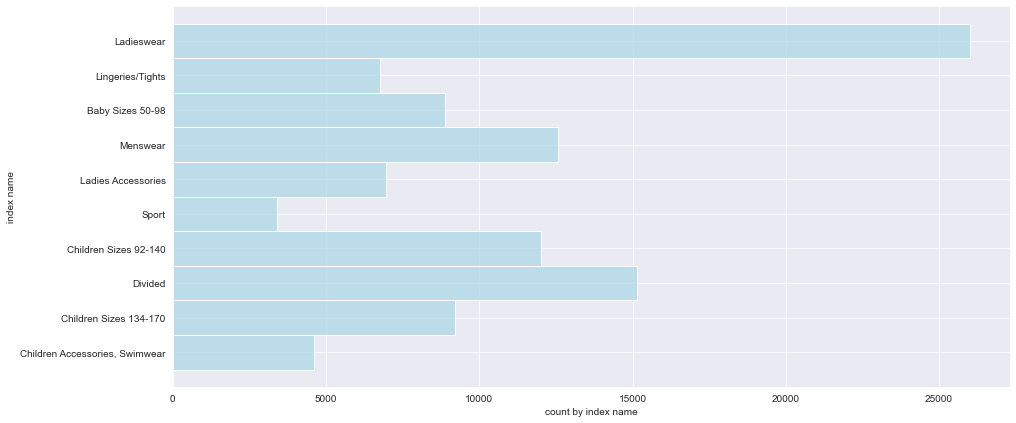

In [96]:
# EDA OF ARTICLES (products offered)

# plot count of articles by index name
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=articles, y='index_name', color='lightblue')
ax.set_xlabel('count by index name')
ax.set_ylabel('index name')
plt.show()

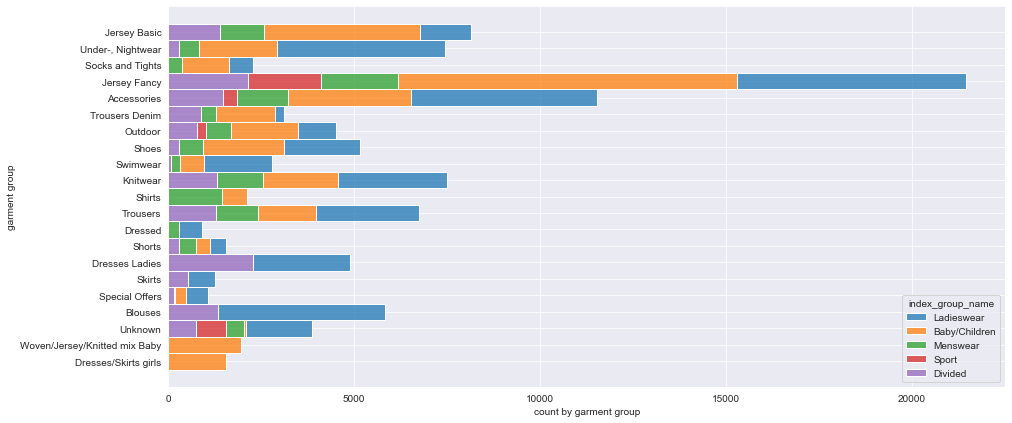

In [97]:
# group items by garment group
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=articles, y='garment_group_name', hue='index_group_name', multiple="stack")
ax.set_xlabel('count by garment group')
ax.set_ylabel('garment group')
plt.show()

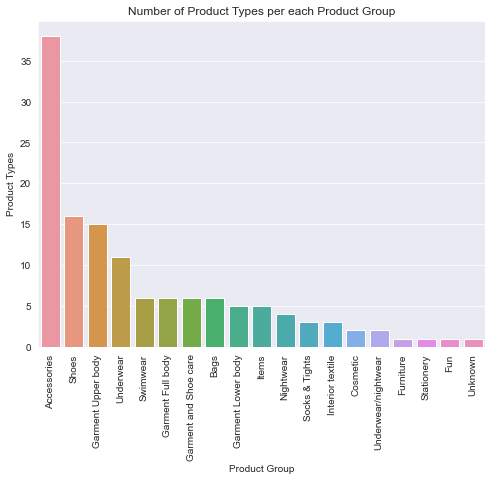

In [98]:
# number of product types by product group
temp = articles.groupby(["product_group_name"])["product_type_name"].nunique()
df = pd.DataFrame({'Product Group': temp.index,
                   'Product Types': temp.values
                  })
df = df.sort_values(['Product Types'], ascending=False)
plt.figure(figsize = (8,6))
plt.title('Number of Product Types per each Product Group')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Product Group', y="Product Types", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

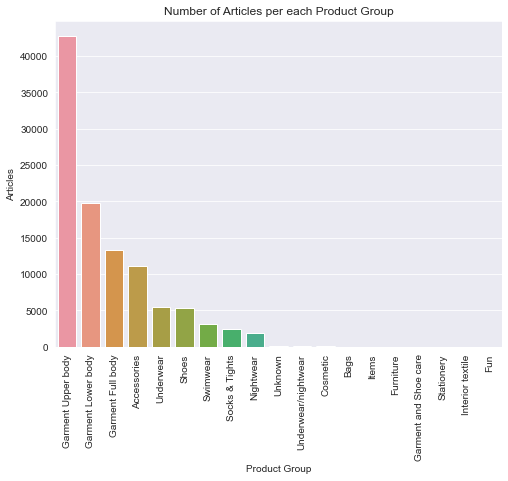

In [99]:
# number of articles per produdct group
temp = articles.groupby(["product_group_name"])["article_id"].nunique()
df = pd.DataFrame({'Product Group': temp.index,
                   'Articles': temp.values
                  })
df = df.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (8,6))
plt.title('Number of Articles per each Product Group')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Product Group', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

In [100]:
# Look at index group-index structure, notice there are subgroups
articles.groupby(['index_group_name', 'index_name']).count()['article_id']

index_group_name  index_name                    
Baby/Children     Baby Sizes 50-98                   8875
                  Children Accessories, Swimwear     4615
                  Children Sizes 134-170             9214
                  Children Sizes 92-140             12007
Divided           Divided                           15149
Ladieswear        Ladies Accessories                 6961
                  Ladieswear                        26001
                  Lingeries/Tights                   6775
Menswear          Menswear                          12553
Sport             Sport                              3392
Name: article_id, dtype: int64

In [101]:
# Look at product group-product structure
pd.options.display.max_rows = None
articles.groupby(['product_group_name', 'product_type_name']).count()['article_id']

product_group_name     product_type_name       
Accessories            Accessories set                 7
                       Alice band                      6
                       Baby Bib                        3
                       Bag                          1280
                       Beanie                         56
                       Belt                          458
                       Bracelet                      180
                       Braces                          3
                       Bucket hat                      7
                       Cap                            13
                       Cap/peaked                    573
                       Dog Wear                       20
                       Earring                      1159
                       Earrings                       11
                       Eyeglasses                      2
                       Felt hat                       10
                       Giftbox          

In [102]:
# look at table with unique values in columns
for col in articles.columns:
    if not 'no' in col and not 'code' in col and not 'id' in col:
        un_n = articles[col].nunique()
        print(f'n of unique {col}: {un_n}')

n of unique prod_name: 45875
n of unique product_type_name: 131
n of unique product_group_name: 19
n of unique graphical_appearance_name: 30
n of unique colour_group_name: 50
n of unique perceived_colour_value_name: 8
n of unique perceived_colour_master_name: 20
n of unique department_name: 250
n of unique index_name: 10
n of unique index_group_name: 5
n of unique section_name: 56
n of unique garment_group_name: 21
n of unique detail_desc: 43404


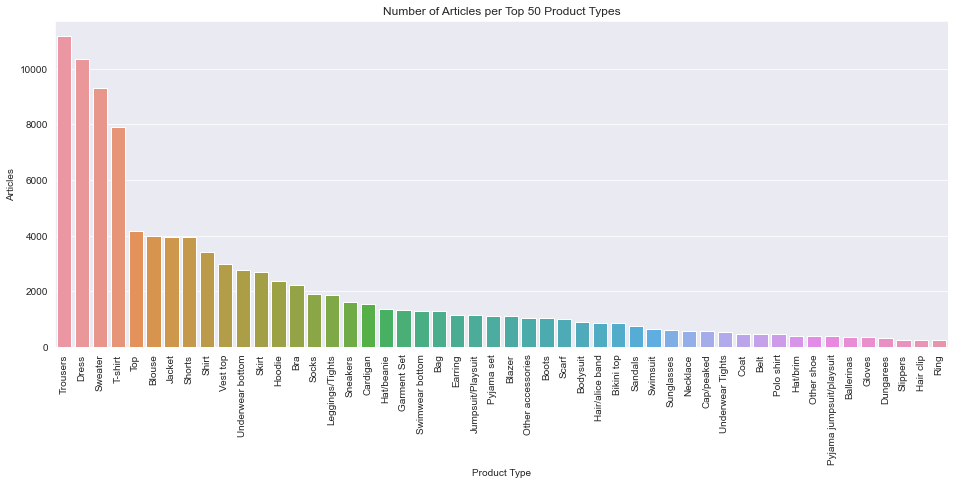

In [103]:
# top 50 number of articles by product type
temp = articles.groupby(["product_type_name"])["article_id"].nunique()
df = pd.DataFrame({'Product Type': temp.index,
                   'Articles': temp.values
                  })
total_types = len(df['Product Type'].unique())
df = df.sort_values(['Articles'], ascending=False)[0:50]
plt.figure(figsize = (16,6))
plt.title(f'Number of Articles per Top 50 Product Types')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Product Type', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

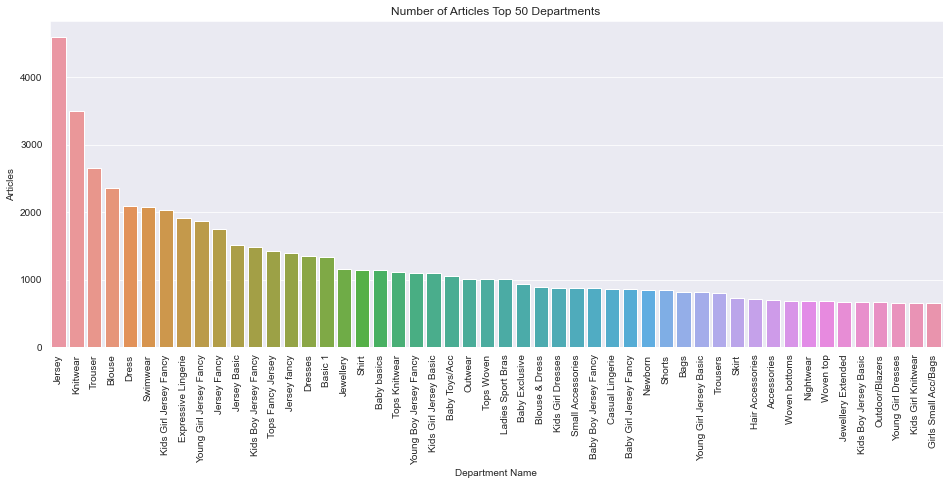

In [104]:
# top 50 number of articles per department
temp = articles.groupby(["department_name"])["article_id"].nunique()
df = pd.DataFrame({'Department Name': temp.index,
                   'Articles': temp.values
                  })
total_depts = len(df['Department Name'].unique())
df = df.sort_values(['Articles'], ascending=False).head(50)
plt.figure(figsize = (16,6))
plt.title(f'Number of Articles Top 50 Departments')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Department Name', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

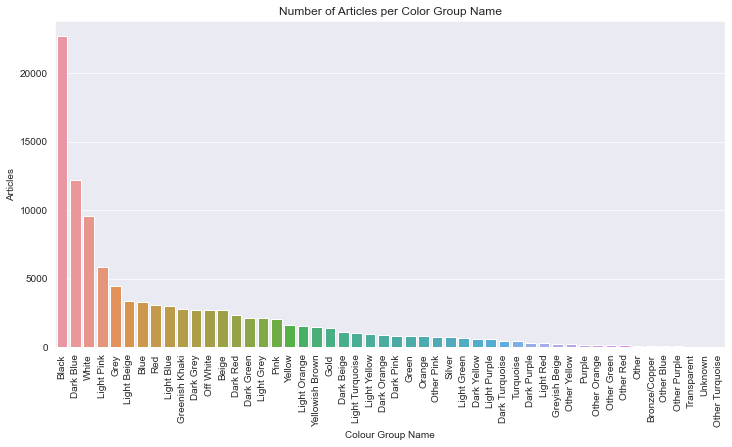

In [105]:
# number of articles by color offered

temp = articles.groupby(["colour_group_name"])["article_id"].nunique()
df = pd.DataFrame({'Colour Group Name': temp.index,
                   'Articles': temp.values
                  })
df = df.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (12,6))
plt.title(f'Number of Articles per Color Group Name')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Colour Group Name', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

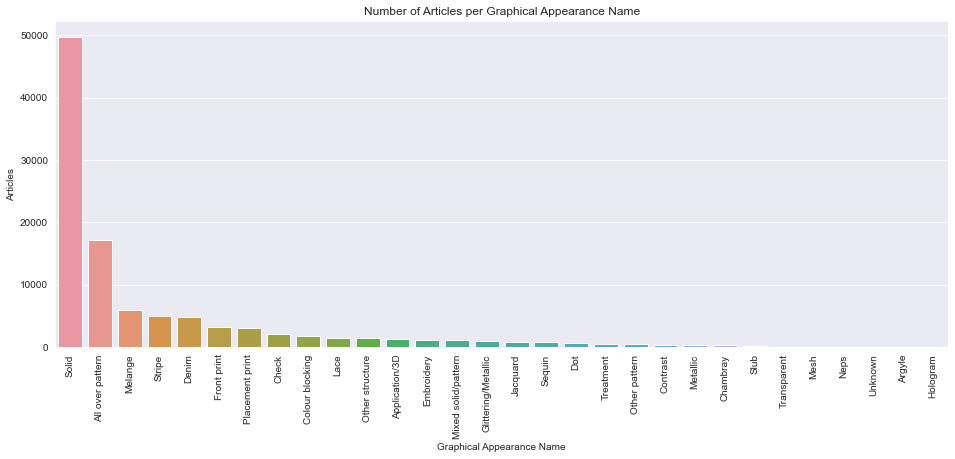

In [106]:
# number of articles by graphical appearance

temp = articles.groupby(["graphical_appearance_name"])["article_id"].nunique()
df = pd.DataFrame({'Graphical Appearance Name': temp.index,
                   'Articles': temp.values
                  })
df = df.sort_values(['Articles'], ascending=False).head(50)
plt.figure(figsize = (16,6))
plt.title(f'Number of Articles per Graphical Appearance Name')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Graphical Appearance Name', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

# EDA OF CUSTOMERS DATA

In [107]:
# check for duplicate customer data
customers.shape[0] - customers['customer_id'].nunique()

0

In [108]:
# look at customer zip codes
data_postal = customers.groupby('postal_code', as_index=False).count().sort_values('customer_id', ascending=False)
data_postal.head()


,postal_code,customer_id,FN,Active,club_member_status,fashion_news_frequency,age
61034,2c29ae653a9282cce4151bd87643c907644e09541abc28...,120303,42874,39886,118281,114377,118002
281937,cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac...,261,109,104,261,261,260
156090,714976379549eb90aae4a71bca6c7402cc646ae7c40f6c...,159,90,88,159,159,158
171208,7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5...,157,55,54,157,156,156
126228,5b7eb31eabebd3277de632b82267286d847fd5d44287ee...,156,42,41,156,156,155


Zip code 61034 is an outlier, probably encoded to be a NaN address or something like a distribution center.

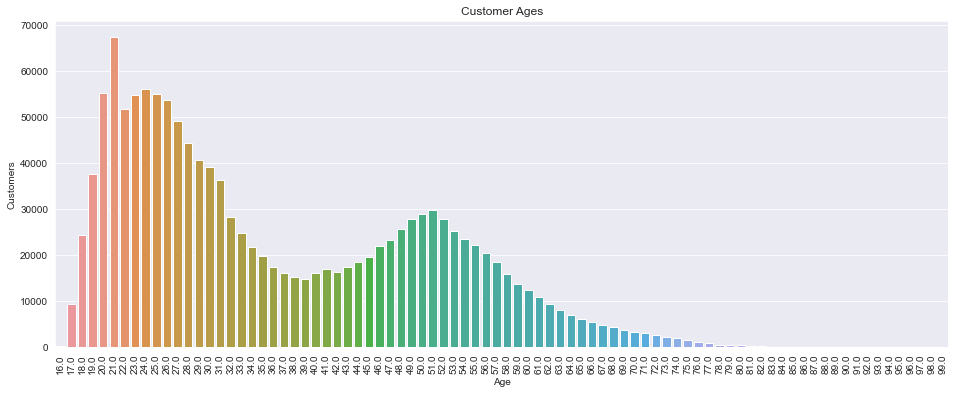

In [109]:
# look at customer ages 
temp = customers.groupby(["age"])["customer_id"].count()
df = pd.DataFrame({'Age': temp.index,
                   'Customers': temp.values
                  })
df = df.sort_values(['Age'], ascending=False)
plt.figure(figsize = (16,6))
plt.title(f'Customer Ages')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Age', y="Customers", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

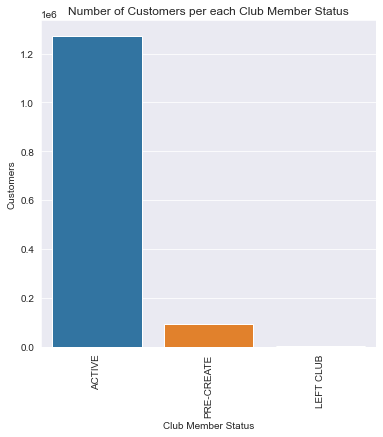

In [110]:
# look at H&M club status
temp = customers.groupby(["club_member_status"])["customer_id"].count()
df = pd.DataFrame({'Club Member Status': temp.index,
                   'Customers': temp.values
                  })
df = df.sort_values(['Customers'], ascending=False)
plt.figure(figsize = (6,6))
plt.title(f'Number of Customers per each Club Member Status')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Club Member Status', y="Customers", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

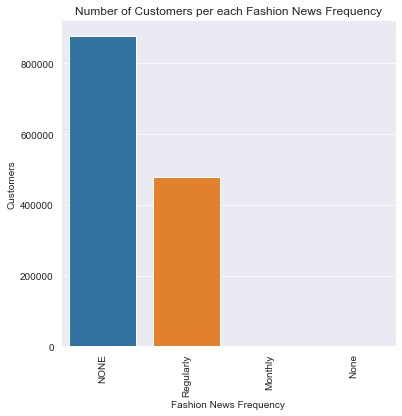

In [111]:
# look at fashion news agency
temp = customers.groupby(["fashion_news_frequency"])["customer_id"].count()
df = pd.DataFrame({'Fashion News Frequency': temp.index,
                   'Customers': temp.values
                  })
df = df.sort_values(['Customers'], ascending=False)
plt.figure(figsize = (6,6))
plt.title(f'Number of Customers per each Fashion News Frequency')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Fashion News Frequency', y="Customers", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

# EDA OF TRANSACTIONS DATA

In [112]:
# look at price data
pd.set_option('display.float_format', '{:.4f}'.format)
transactions.describe()['price']

# shows outliers

count   31788324.0000
mean           0.0278
std            0.0192
min            0.0000
25%            0.0158
50%            0.0254
75%            0.0339
max            0.5915
Name: price, dtype: float64

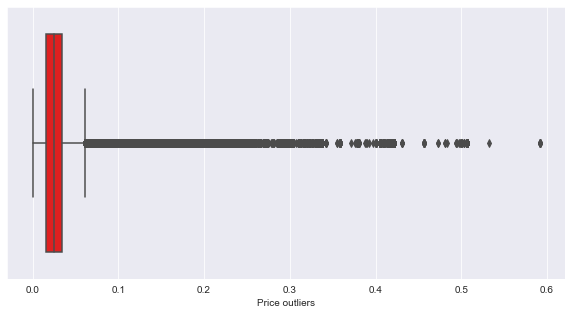

In [113]:
# plot price data to look at outliers
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(data=transactions, x='price', color='red')
ax.set_xlabel('Price outliers')
plt.show()

In [114]:
# look at top 10 customers based on number of transactions
transactions_byid = transactions.groupby('customer_id').count()
transactions_byid.sort_values(by='price', ascending=False)['price'][:10]

customer_id
be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b    1895
b4db5e5259234574edfff958e170fe3a5e13b6f146752ca066abca3c156acc71    1441
49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05b50a4cd88e34d0748f    1364
a65f77281a528bf5c1e9f270141d601d116e1df33bf9df512f495ee06647a9cc    1361
cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed6012e7e5bea016b4d6    1237
55d15396193dfd45836af3a6269a079efea339e875eff42cc0c228b002548a9d    1208
c140410d72a41ee5e2e3ba3d7f5a860f337f1b5e41c27cf9bda5517c8774f8fa    1170
8df45859ccd71ef1e48e2ee9d1c65d5728c31c46ae957d659fa4e5c3af6cc076    1169
03d0011487606c37c1b1ed147fc72f285a50c05f00b9712e0fc3da400c864296    1157
6cc121e5cc202d2bf344ffe795002bdbf87178054bcda2e57161f0ef810a4b55    1143
Name: price, dtype: int64

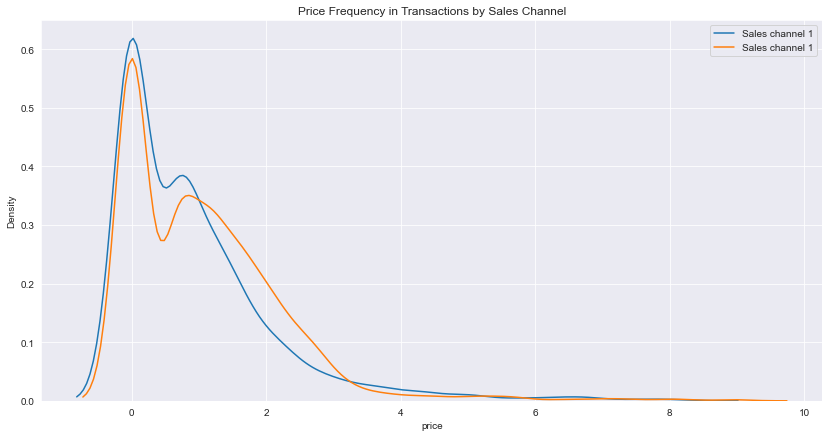

In [115]:
# look at log dist of price frequency by sales channel, 100k sample size
df = transactions.sample(100_000)
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
sns.kdeplot(np.log(df.loc[df["sales_channel_id"]==1].price.value_counts()))
sns.kdeplot(np.log(df.loc[df["sales_channel_id"]==2].price.value_counts()))
ax.legend(labels=['Sales channel 1', 'Sales channel 1'])
plt.title("Price Frequency in Transactions by Sales Channel")
plt.show()

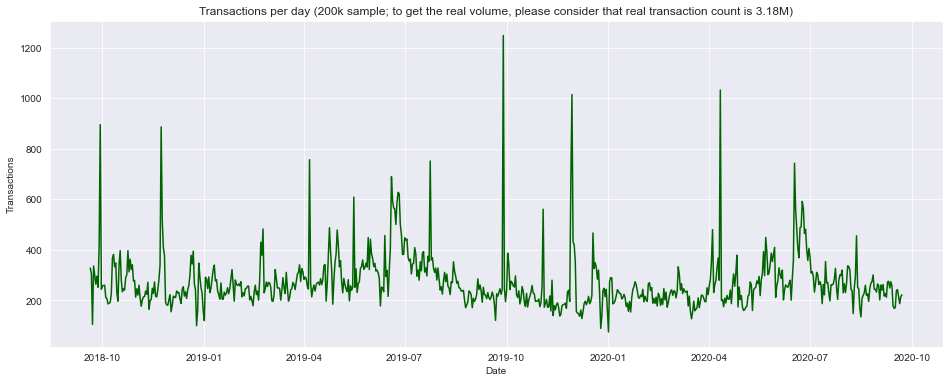

In [116]:
# look at transactions per day
df = transactions.sample(200_000).groupby(["t_dat"])["article_id"].count().reset_index()
df["t_dat"] = df["t_dat"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df.columns = ["Date", "Transactions"]
fig, ax = plt.subplots(1, 1, figsize=(16,6))
plt.plot(df["Date"], df["Transactions"], color="Darkgreen")
plt.xlabel("Date")
plt.ylabel("Transactions")
plt.title(f"Transactions per day (200k sample; to get the real volume, please consider that real transaction count is {round(transactions.shape[0]/10.e6,2)}M)")
plt.show()

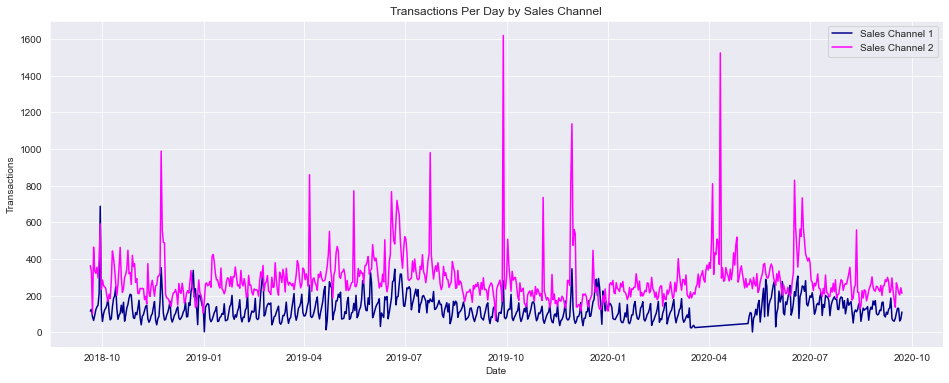

In [117]:
# look at transactions per day by sales channel
df = transactions.sample(300_000).groupby(["t_dat", "sales_channel_id"])["article_id"].count().reset_index()
df["t_dat"] = df["t_dat"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df.columns = ["Date", "Sales Channel Id", "Transactions"]
fig, ax = plt.subplots(1, 1, figsize=(16,6))
g1 = ax.plot(df.loc[df["Sales Channel Id"]==1, "Date"], df.loc[df["Sales Channel Id"]==1, "Transactions"], label="Sales Channel 1", color="Darkblue")
g2 = ax.plot(df.loc[df["Sales Channel Id"]==2, "Date"], df.loc[df["Sales Channel Id"]==2, "Transactions"], label="Sales Channel 2", color="Magenta")
plt.xlabel("Date")
plt.ylabel("Transactions")
ax.legend()
plt.title(f"Transactions Per Day by Sales Channel")
plt.show()

#channel 1 = in store
#channel 2 = onlne

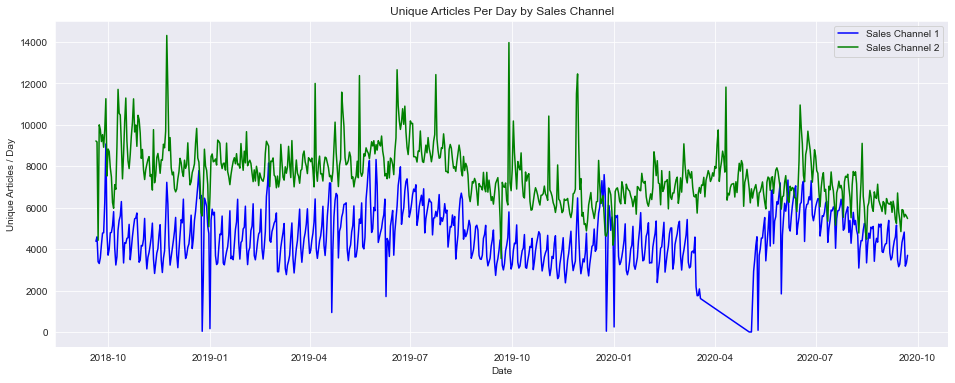

In [118]:
# look at unique articles per day by sales channel
df = transactions.groupby(["t_dat", "sales_channel_id"])["article_id"].nunique().reset_index()
df["t_dat"] = df["t_dat"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df.columns = ["Date", "Sales Channel Id", "Unique Articles"]
fig, ax = plt.subplots(1, 1, figsize=(16,6))
g1 = ax.plot(df.loc[df["Sales Channel Id"]==1, "Date"], df.loc[df["Sales Channel Id"]==1, "Unique Articles"], label="Sales Channel 1", color="Blue")
g2 = ax.plot(df.loc[df["Sales Channel Id"]==2, "Date"], df.loc[df["Sales Channel Id"]==2, "Unique Articles"], label="Sales Channel 2", color="Green")
plt.xlabel("Date")
plt.ylabel("Unique Articles / Day")
ax.legend()
plt.title(f"Unique Articles Per Day by Sales Channel")
plt.show()

# EDA WITH MERGED ARTICLES AND TRANSACTION DATA
Get subset from articles and merge to transaction in order to look at groups

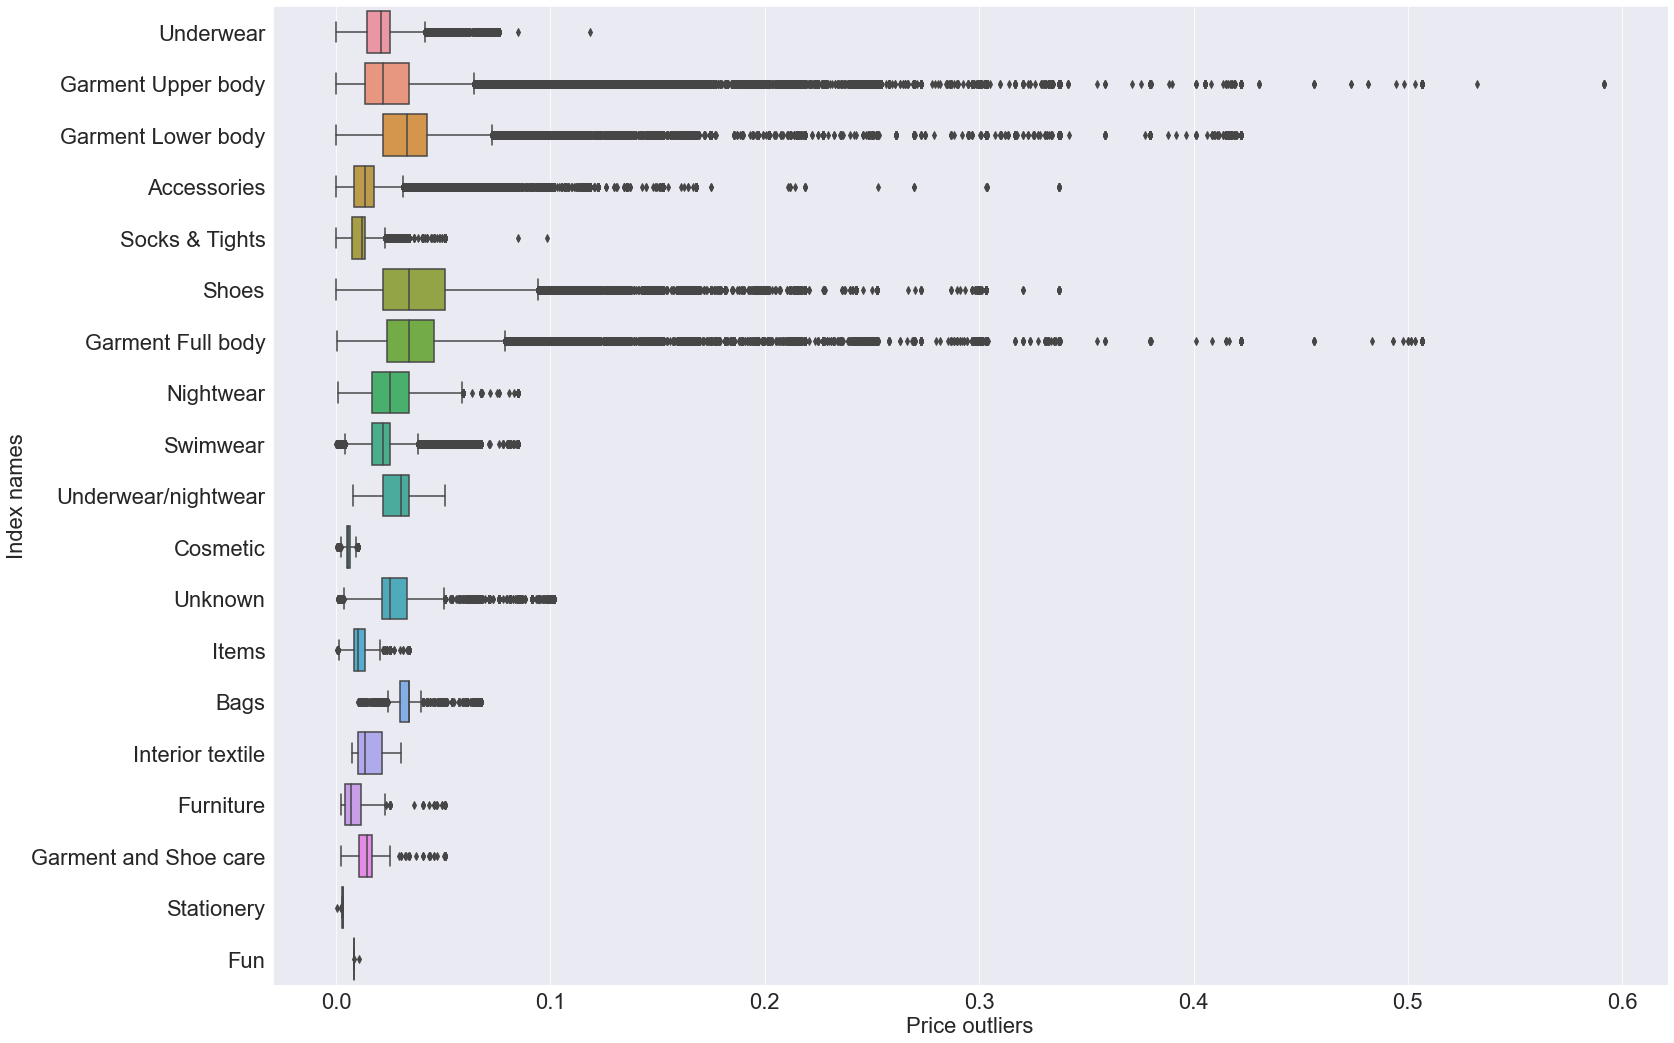

In [119]:
# compare prices inside groups, more accurate since accessories/trouser prices may vary significantly 

# merge some articles data for subset grouping
articles_for_merge = articles[['article_id', 'prod_name', 'product_type_name', 'product_group_name', 'index_name']]
articles_for_merge = transactions[['customer_id', 'article_id', 'price', 't_dat']].merge(articles_for_merge, on='article_id', how='left')

# plot boxplot prices
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(25,18))
ax = sns.boxplot(data=articles_for_merge, x='price', y='product_group_name')
ax.set_xlabel('Price outliers', fontsize=22)
ax.set_ylabel('Index names', fontsize=22)
ax.xaxis.set_tick_params(labelsize=22)
ax.yaxis.set_tick_params(labelsize=22)

plt.show()

Now we can see outliers for group name prices. There are huge variances for lower/upper/full body.

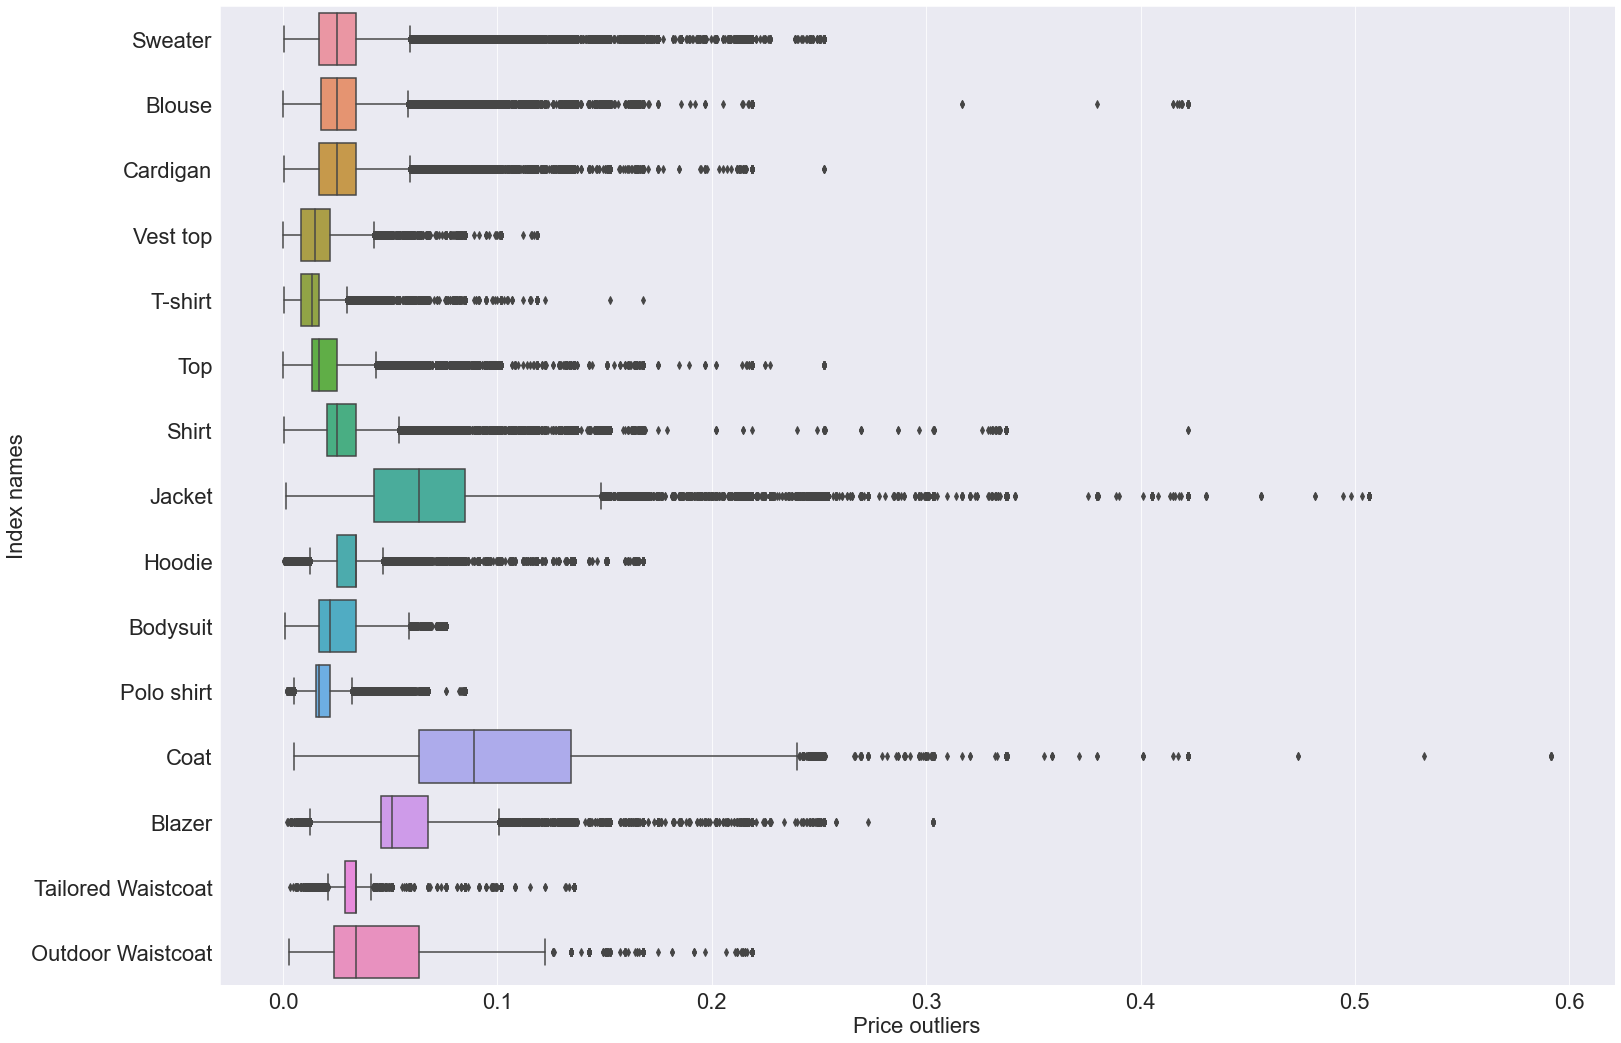

In [120]:
# next look at boxplot prices for garment upper body product group to find high prices in that group

sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(25,18))
_ = articles_for_merge[articles_for_merge['product_group_name'] == 'Garment Upper body']
ax = sns.boxplot(data=_, x='price', y='product_type_name')
ax.set_xlabel('Price outliers', fontsize=22)
ax.set_ylabel('Index names', fontsize=22)
ax.xaxis.set_tick_params(labelsize=22)
ax.yaxis.set_tick_params(labelsize=22)
del _

plt.show()

The biggest outliers are in the coat group, wich makes sense. Coats are expensive.

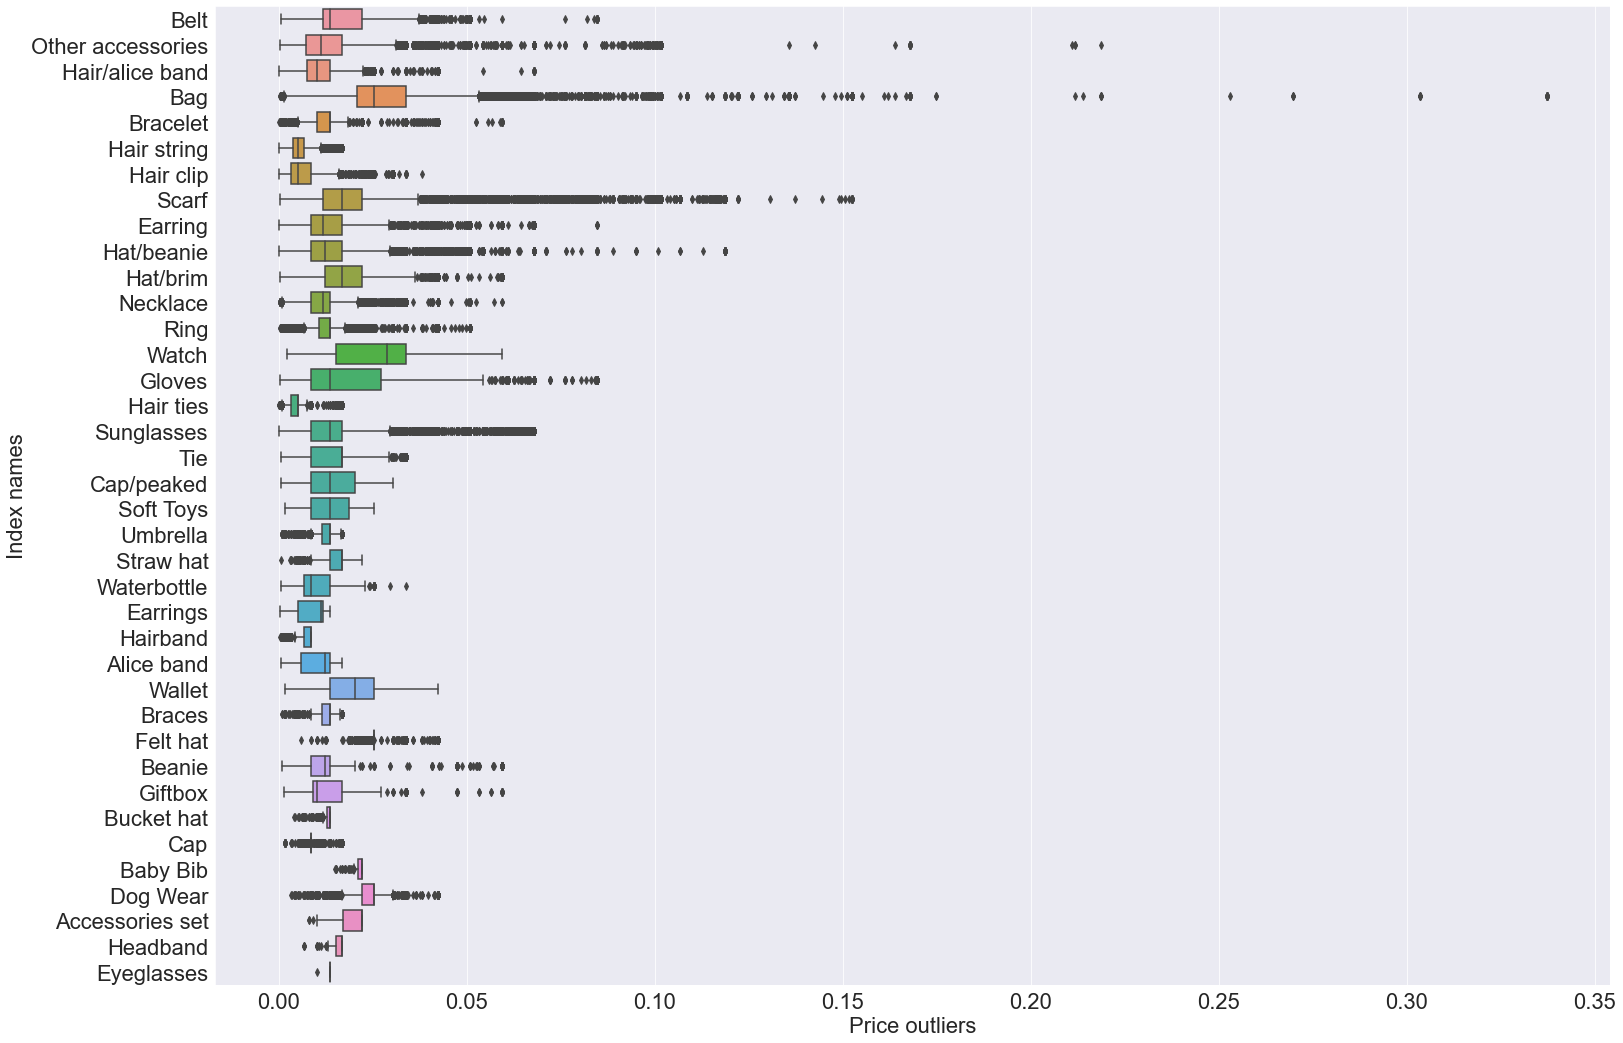

In [43]:
# next look at boxplot prices for accessories product group to find high prices in that group

sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(25,18))
_ = articles_for_merge[articles_for_merge['product_group_name'] == 'Accessories']
ax = sns.boxplot(data=_, x='price', y='product_type_name')
ax.set_xlabel('Price outliers', fontsize=22)
ax.set_ylabel('Index names', fontsize=22)
ax.xaxis.set_tick_params(labelsize=22)
ax.yaxis.set_tick_params(labelsize=22)
del _

plt.show()

The biggest outliers are among bags, which makes sense (Melissa knows all about expensive purses). Scarves and other accessories have articles with prices highly contrasting to the rest of garments.

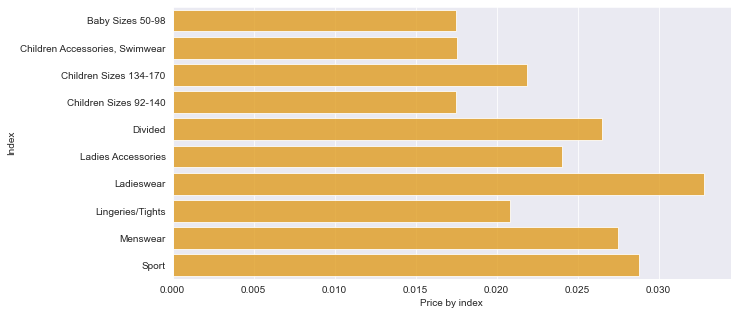

In [98]:
# look at mean prices by index
articles_index = articles_for_merge[['index_name', 'price']].groupby('index_name').mean()
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x=articles_index.price, y=articles_index.index, color='orange', alpha=0.8)
ax.set_xlabel('Price by index')
ax.set_ylabel('Index')
plt.show()

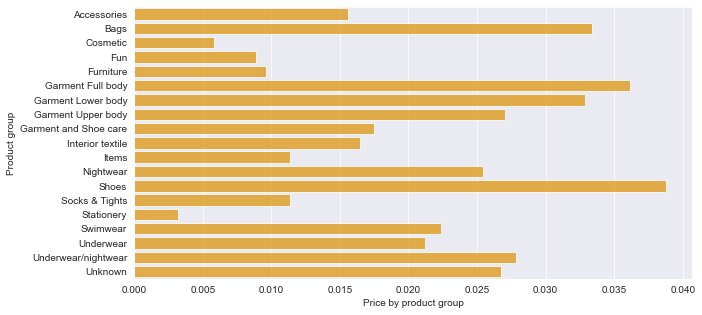

In [45]:
# look at mean prices by product group
articles_index = articles_for_merge[['product_group_name', 'price']].groupby('product_group_name').mean()
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x=articles_index.price, y=articles_index.index, color='orange', alpha=0.8)
ax.set_xlabel('Price by product group')
ax.set_ylabel('Product group')
plt.show()

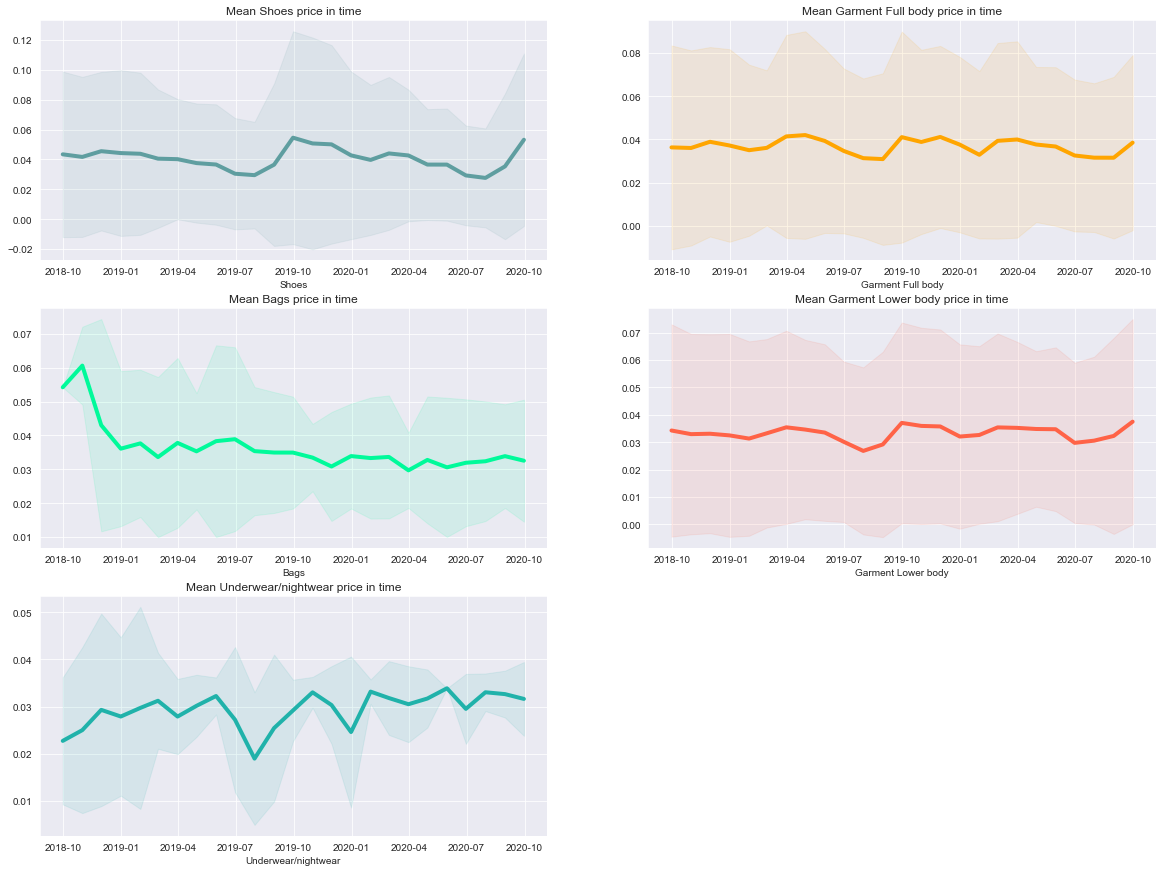

In [46]:
# look at mean price changes over time for top 5 product groups
articles_for_merge['t_dat'] = pd.to_datetime(articles_for_merge['t_dat'])

product_list = ['Shoes', 'Garment Full body', 'Bags', 'Garment Lower body', 'Underwear/nightwear']
colors = ['cadetblue', 'orange', 'mediumspringgreen', 'tomato', 'lightseagreen']
k = 0
f, ax = plt.subplots(3, 2, figsize=(20, 15))
for i in range(3):
    for j in range(2):
        try:
            product = product_list[k]
            articles_for_merge_product = articles_for_merge[articles_for_merge.product_group_name == product_list[k]]
            series_mean = articles_for_merge_product[['t_dat', 'price']].groupby(pd.Grouper(key="t_dat", freq='M')).mean().fillna(0)
            series_std = articles_for_merge_product[['t_dat', 'price']].groupby(pd.Grouper(key="t_dat", freq='M')).std().fillna(0)
            ax[i, j].plot(series_mean, linewidth=4, color=colors[k])
            ax[i, j].fill_between(series_mean.index, (series_mean.values-2*series_std.values).ravel(), 
                             (series_mean.values+2*series_std.values).ravel(), color=colors[k], alpha=.1)
            ax[i, j].set_title(f'Mean {product_list[k]} price in time')
            ax[i, j].set_xlabel('month')
            ax[i, j].set_xlabel(f'{product_list[k]}')
            k += 1
        except IndexError:
            ax[i, j].set_visible(False)
plt.show()

# EDA OF IMAGE DATA

In [49]:
# There are 105,542 articles and 105,100 different images. 
# Let's first check which articles does not have corresponding images.

# read in the image files
total_folders = total_files = 0
folder_info = []
images_names = []
for base, dirs, files in tqdm(os.walk('images/')):
    for directories in dirs:
        folder_info.append((directories, len(os.listdir(os.path.join(base, directories)))))
        total_folders += 1
    for _files in files:
        total_files += 1
        if len(_files.split(".jpg"))==2:
            images_names.append(_files.split(".jpg")[0])


0it [00:00, ?it/s]

In [50]:
# check images import
print(f"Total number of folders: {total_folders}\nTotal number of files: {total_files}")
folder_info_df = pd.DataFrame(folder_info, columns=["folder", "files count"])
folder_info_df.sort_values(["files count"], ascending=False).head()

Total number of folders: 86
Total number of files: 105101


,folder,files count
79,069,4187
44,073,3438
26,062,3361
75,068,3313
11,070,3309


In [51]:
# merge image data with articles
image_name_df = pd.DataFrame(images_names, columns = ["image_name"])
image_name_df["article_id"] = image_name_df["image_name"].apply(lambda x: int(x[1:]))

image_article_df = articles[["article_id", "product_code", "product_group_name", "product_type_name"]].merge(image_name_df, on=["article_id"], how="left")
print(image_article_df.shape)
image_article_df.head()

(105542, 5)


,article_id,product_code,product_group_name,product_type_name,image_name
0,108775015,108775,Garment Upper body,Vest top,0108775015
1,108775044,108775,Garment Upper body,Vest top,0108775044
2,108775051,108775,Garment Upper body,Vest top,0108775051
3,110065001,110065,Underwear,Bra,0110065001
4,110065002,110065,Underwear,Bra,0110065002


In [52]:
# create df without images
article_no_image_df = image_article_df.loc[image_article_df.image_name.isna()]
print(article_no_image_df.shape)
article_no_image_df.head()

(442, 5)


,article_id,product_code,product_group_name,product_type_name,image_name
88,174057028,174057,Nightwear,Pyjama jumpsuit/playsuit,NaN
117,179208001,179208,Garment Lower body,Leggings/Tights,NaN
258,212042043,212042,Shoes,Sneakers,NaN
259,212042066,212042,Shoes,Sneakers,NaN
261,212629004,212629,Garment Full body,Dress,NaN


In [53]:
# Finally, check for missing images
print("Product codes with some missing images: ", article_no_image_df.product_code.nunique())
print("Product groups with some missing images: ", list(article_no_image_df.product_group_name.unique()))

Product codes with some missing images:  372
Product groups with some missing images:  ['Nightwear', 'Garment Lower body', 'Shoes', 'Garment Full body', 'Accessories', 'Garment Upper body', 'Underwear', 'Socks & Tights', 'Swimwear', 'Cosmetic']


In [54]:
# visualize some images

# create function to visualize images from folder based on some key
def plot_image_samples(image_article_df, product_group_name, cols=1, rows=-1):
    image_path = "images/"
    _df = image_article_df.loc[image_article_df.product_group_name==product_group_name]
    article_ids = _df.article_id.values[0:cols*rows]
    plt.figure(figsize=(2 + 3 * cols, 2 + 4 * rows))
    for i in range(cols * rows):
        article_id = ("0" + str(article_ids[i]))[-10:]
        plt.subplot(rows, cols, i + 1)
        plt.axis('off')
        plt.title(f"{product_group_name} {article_id[:3]}\n{article_id}.jpg")
        image = Image.open(f"{image_path}{article_id[:3]}/{article_id}.jpg")
        plt.imshow(image)

In [55]:
# check product group names to pick some to visualize
print(image_article_df.product_group_name.unique())

['Garment Upper body' 'Underwear' 'Socks & Tights' 'Garment Lower body'
 'Accessories' 'Items' 'Nightwear' 'Unknown' 'Underwear/nightwear' 'Shoes'
 'Swimwear' 'Garment Full body' 'Cosmetic' 'Interior textile' 'Bags'
 'Furniture' 'Garment and Shoe care' 'Fun' 'Stationery']


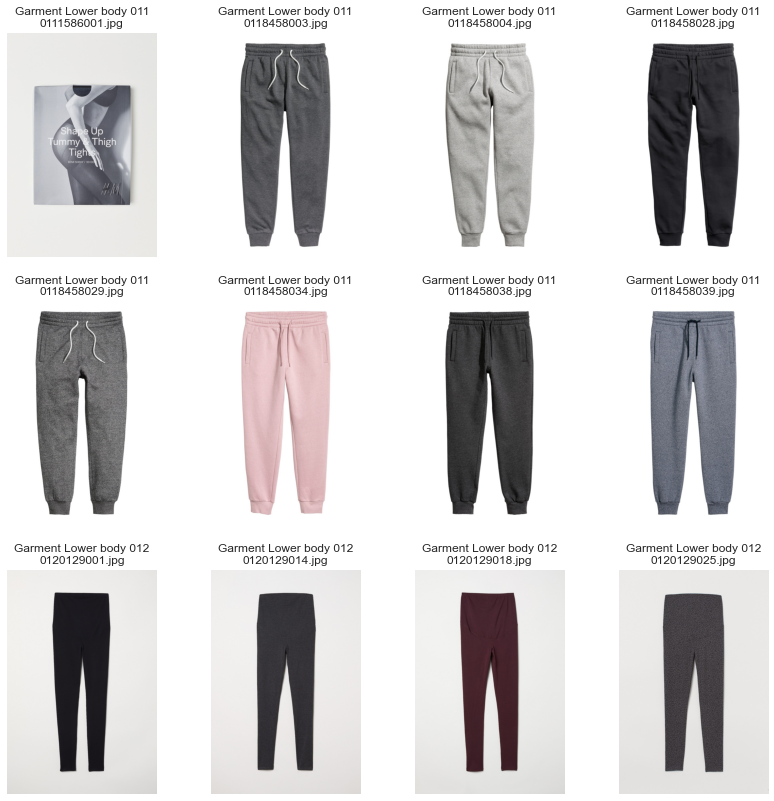

In [56]:
# check the image plot function
plot_image_samples(image_article_df, "Garment Lower body", 4, 3)

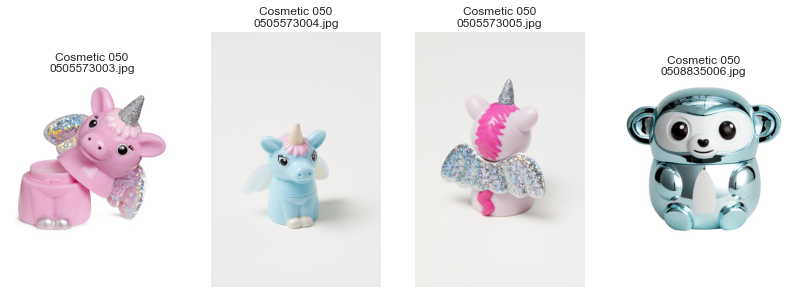

In [57]:
plot_image_samples(image_article_df, "Cosmetic", 4, 1)

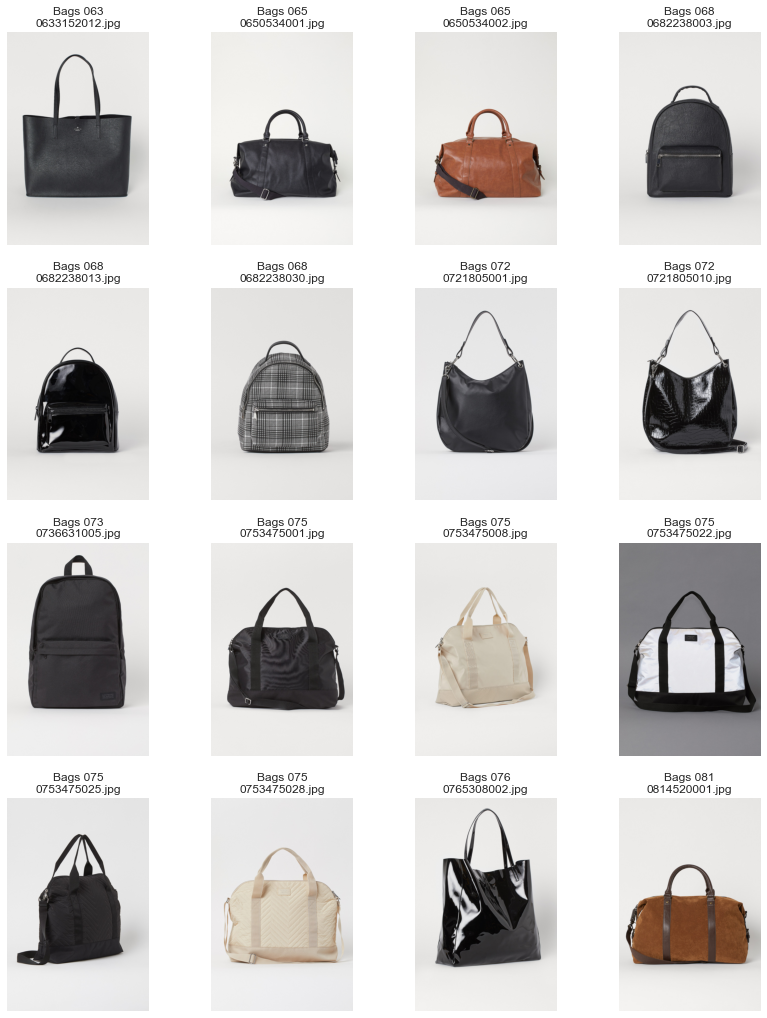

In [58]:
plot_image_samples(image_article_df, "Bags", 4, 4)

In [59]:
# look at last purchases by max and min price

# create merged df
max_price_ids = transactions[transactions.t_dat==transactions.t_dat.max()].sort_values('price', ascending=False).iloc[:5][['article_id', 'price']]
min_price_ids = transactions[transactions.t_dat==transactions.t_dat.min()].sort_values('price', ascending=True).iloc[:5][['article_id', 'price']]

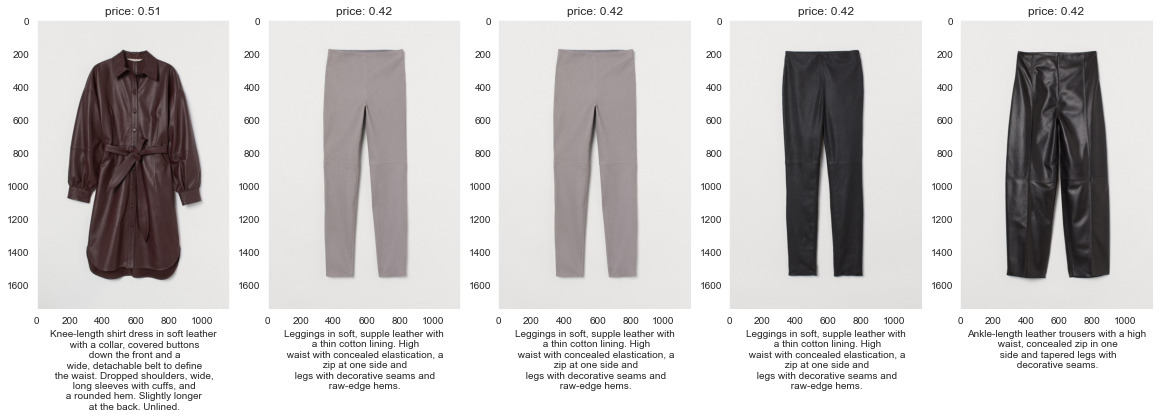

In [60]:
# display photos with description and price of top 5 max priced items
f, ax = plt.subplots(1, 5, figsize=(20,10))
i = 0
for _, data in max_price_ids.iterrows():
    desc = articles[articles['article_id'] == data['article_id']]['detail_desc'].iloc[0]
    desc_list = desc.split(' ')
    for j, elem in enumerate(desc_list):
        if j > 0 and j % 5 == 0:
            desc_list[j] = desc_list[j] + '\n'
    desc = ' '.join(desc_list)
    img = mpimg.imread(f'images/0{str(data.article_id)[:2]}/0{int(data.article_id)}.jpg')
    ax[i].imshow(img)
    ax[i].set_title(f'price: {data.price:.2f}')
    #ax[i].set_xticks([], [])
    #ax[i].set_yticks([], [])
    ax[i].grid(False)
    ax[i].set_xlabel(desc, fontsize=10)
    i += 1
plt.show()

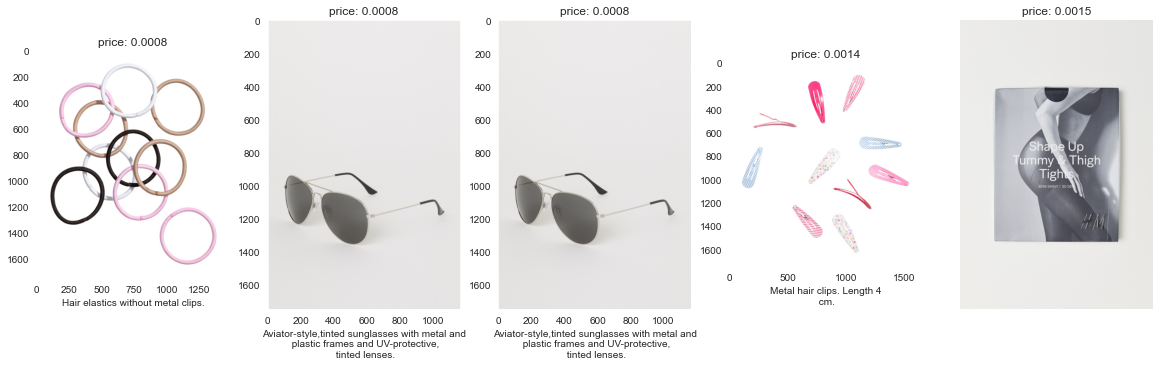

In [61]:
# display photos with description and price of top 5 min priced items

f, ax = plt.subplots(1, 5, figsize=(20,10))
i = 0
for _, data in min_price_ids.iterrows():
    desc = articles[articles['article_id'] == data['article_id']]['detail_desc'].iloc[0]
    desc_list = desc.split(' ')
    for j, elem in enumerate(desc_list):
        if j > 0 and j % 4 == 0:
            desc_list[j] = desc_list[j] + '\n'
    desc = ' '.join(desc_list)
    img = mpimg.imread(f'images/0{str(data.article_id)[:2]}/0{int(data.article_id)}.jpg')
    ax[i].imshow(img)
    ax[i].set_title(f'price: {data.price:.4f}')
    ax[i].set_xlabel(desc, fontsize=10)
    #ax[i].set_xticks([], [])
    #ax[i].set_yticks([], [])
    ax[i].grid(False)
    i += 1
plt.axis('off')
plt.show()

# SIMPLE BASELINE MODEL

In [121]:
# import a fresh transaction df for training
train = pd.read_csv("transactions_train.csv")
train = train.sort_values(["customer_id", "t_dat"], ascending=False)
train.head()

,t_dat,customer_id,article_id,price,sales_channel_id
19867243,2019-12-04,ffffd9ac14e89946416d80e791d064701994755c3ab686...,806050001,0.0847,2
27806865,2020-06-22,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,882810001,0.0169,1
25077914,2020-04-25,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,866755002,0.0508,2
24375394,2020-04-09,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,866755002,0.0432,2
24375395,2020-04-09,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,840360003,0.0135,2


In [122]:
# read in the sample submission data for training comparison
sample_submission_df = pd.read_csv("sample_submission.csv")

In [123]:
# look at most frequent recently purchased items
last_date = train.t_dat.max()
print(last_date)
print(train.loc[train.t_dat==last_date].shape)

2020-09-22
(32866, 5)


In [124]:
# print most frequent recently purchased items article id
most_frequent_articles = list(train.loc[train.t_dat==last_date].article_id.value_counts()[0:12].index)
art_list = []
for art in most_frequent_articles:
    art = "0"+str(art)
    art_list.append(art)
art_str = " ".join(art_list)
print("Frequent articles bought recently: ", art_str)

Frequent articles bought recently:  0924243002 0751471001 0448509014 0918522001 0866731001 0714790020 0788575004 0915529005 0573085028 0918292001 0850917001 0928206001


In [125]:
# aggregate the training data and compare values to sample submission
agg_df = train.groupby(["customer_id"])["article_id"].agg(lambda x: str(x.values[0:12])[1:-1]).reset_index()

def padding_articles(x):
    if x:
        xl = x.split()
        x = []
        for xi in xl:
            x.append("0"+xi)
        dimm_x = len(x)
        if dimm_x < 12:
            x.extend(art_list[:12-dimm_x])
        return(" ".join(x))
    
agg_df["article_id"] = agg_df["article_id"].apply(lambda x: padding_articles(x))

print("Aggregated transaction history: ", agg_df.customer_id.nunique())
print("Submission sample: ", sample_submission_df.customer_id.nunique())

Aggregated transaction history:  1362281
Submission sample:  1371980


In [126]:
# look at sample submission
print(sample_submission_df.shape)
sample_submission_df.head()

(1371980, 2)


,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0706016001 0706016002 0372860001 0610776002 07...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0706016001 0706016002 0372860001 0610776002 07...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0706016001 0706016002 0372860001 0610776002 07...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0706016001 0706016002 0372860001 0610776002 07...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0706016001 0706016002 0372860001 0610776002 07...


In [127]:
# replace values in sample submission with existing ones in aggregated transactions
submission_df = agg_df.merge(sample_submission_df[["customer_id"]], how="right")
submission_df.columns = ["customer_id", "prediction"]
print(submission_df.shape)
submission_df.head()

(1371980, 2)


,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0568601043 0841260003 0887593002 0890498002 07...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0826211002 0599580055 0599580055 0811835004 08...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0794321007 0858883002 0851400006 0750424014 07...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0742079001 0732413001 0924243002 0751471001 04...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0896152002 0730683050 0927530004 0791587015 05...


In [128]:
# check for missing data
print("Rows with missing data in submission: ", submission_df.loc[submission_df.prediction.isna()].shape[0])

Rows with missing data in submission:  9699


In [129]:
# replace missing data with most frequently purchased items from recent days
submission_df.loc[submission_df.prediction.isna(), ["prediction"]] = art_str

In [130]:
# recheck for missing data
print("Rows with missing data in submission: ", submission_df.loc[submission_df.prediction.isna()].shape[0])

Rows with missing data in submission:  0


In [131]:
submission_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1371980 entries, 0 to 1371979
Data columns (total 2 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   customer_id  1371980 non-null  object
 1   prediction   1371980 non-null  object
dtypes: object(2)
memory usage: 31.4+ MB


In [206]:
# split article IDs into columns
split_data = submission_df['prediction'].str.split(' ') # split prediction values by space delimiter
data = split_data.to_list()
names = ['prediction 1', 'prediction 2', 'prediction 3', 'prediction 4', 'prediction 5'
         , 'prediction 6', 'prediction 7', 'prediction 8', 'prediction 9', 'prediction 10'
         , 'prediction 11', 'prediction 12']
new_df = pd.DataFrame(data, columns=names)
new_df.head()

,prediction 1,prediction 2,prediction 3,prediction 4,prediction 5,prediction 6,prediction 7,prediction 8,prediction 9,prediction 10,prediction 11,prediction 12
0,0568601043,0841260003,0887593002,0890498002,0795440001,0859416011,0694736004,0785710001,0812683013,0785186005,0797065001,0797065001
1,0826211002,0599580055,0599580055,0811835004,0811835004,0811835004,0811835004,0723529001,0559630026,0599580083,0811927004,0811927004
2,0794321007,0858883002,0851400006,0750424014,0750424014,0870304002,0870304002,0852643001,0852643003,0727808001,0727808007,0723529001
3,0742079001,0732413001,0924243002,0751471001,0448509014,0918522001,0866731001,0714790020,0788575004,0915529005,0573085028,0918292001
4,0896152002,0730683050,0927530004,0791587015,0589440005,0827971001,0818320001,0399061015,0399061015,0698286003,0707704003,0634249005


In [207]:
# look at unique values
print(new_df.nunique())

prediction 1     72178
prediction 2     70798
prediction 3     69482
prediction 4     68403
prediction 5     66886
prediction 6     66095
prediction 7     64908
prediction 8     63998
prediction 9     63328
prediction 10    62259
prediction 11    61547
prediction 12    60779
dtype: int64


In [208]:
# find most recommended article id for each column
# prediction 1
new_df['prediction 1'].value_counts()[new_df['prediction 1'].value_counts() == new_df['prediction 1'].value_counts().max()]

0924243002    9885
Name: prediction 1, dtype: int64

In [228]:
# print info for article id

for i in range(len(articles.prod_name)):
    if 924243002 == articles.article_id[i]:
        indx = i
        
articles.iloc[indx]

article_id                                                              924243002
product_code                                                               924243
prod_name                                                                 Ohlsson
product_type_no                                                               252
product_type_name                                                         Sweater
product_group_name                                             Garment Upper body
graphical_appearance_no                                                   1010016
graphical_appearance_name                                                   Solid
colour_group_code                                                               9
colour_group_name                                                           Black
perceived_colour_value_id                                                       4
perceived_colour_value_name                                                  Dark
perceived_colour

In [210]:
# prediction 2
new_df['prediction 2'].value_counts()[new_df['prediction 2'].value_counts() == new_df['prediction 2'].value_counts().max()]

0924243002    131687
Name: prediction 2, dtype: int64

In [229]:
# print info for article id

for i in range(len(articles.prod_name)):
    if 924243002 == articles.article_id[i]:
        indx = i
        
articles.iloc[indx]

article_id                                                              924243002
product_code                                                               924243
prod_name                                                                 Ohlsson
product_type_no                                                               252
product_type_name                                                         Sweater
product_group_name                                             Garment Upper body
graphical_appearance_no                                                   1010016
graphical_appearance_name                                                   Solid
colour_group_code                                                               9
colour_group_name                                                           Black
perceived_colour_value_id                                                       4
perceived_colour_value_name                                                  Dark
perceived_colour

In [211]:
# prediction 3
new_df['prediction 3'].value_counts()[new_df['prediction 3'].value_counts() == new_df['prediction 3'].value_counts().max()]

0751471001    132576
Name: prediction 3, dtype: int64

In [230]:
# print info for article id

for i in range(len(articles.prod_name)):
    if 751471001 == articles.article_id[i]:
        indx = i
        
articles.iloc[indx]

article_id                                                              751471001
product_code                                                               751471
prod_name                                                     Pluto RW slacks (1)
product_type_no                                                               272
product_type_name                                                        Trousers
product_group_name                                             Garment Lower body
graphical_appearance_no                                                   1010016
graphical_appearance_name                                                   Solid
colour_group_code                                                               9
colour_group_name                                                           Black
perceived_colour_value_id                                                       4
perceived_colour_value_name                                                  Dark
perceived_colour

In [212]:
# prediction 4
new_df['prediction 4'].value_counts()[new_df['prediction 4'].value_counts() == new_df['prediction 4'].value_counts().max()]

0448509014    132212
Name: prediction 4, dtype: int64

In [239]:
# print info for article id

for i in range(len(articles.prod_name)):
    if 448509014 == articles.article_id[i]:
        indx = i
        
articles.iloc[indx]

article_id                                                              448509014
product_code                                                               448509
prod_name                                               Perrie Slim Mom Denim TRS
product_type_no                                                               272
product_type_name                                                        Trousers
product_group_name                                             Garment Lower body
graphical_appearance_no                                                   1010016
graphical_appearance_name                                                   Solid
colour_group_code                                                              72
colour_group_name                                                            Blue
perceived_colour_value_id                                                       3
perceived_colour_value_name                                                 Light
perceived_colour

In [213]:
# prediction 5
new_df['prediction 5'].value_counts()[new_df['prediction 5'].value_counts() == new_df['prediction 5'].value_counts().max()]

0918522001    131623
Name: prediction 5, dtype: int64

In [238]:
# print info for article id

for i in range(len(articles.prod_name)):
    if 918522001 == articles.article_id[i]:
        indx = i
        
articles.iloc[indx]

article_id                                                              918522001
product_code                                                               918522
prod_name                                                       Jackie cable vest
product_type_no                                                               252
product_type_name                                                         Sweater
product_group_name                                             Garment Upper body
graphical_appearance_no                                                   1010016
graphical_appearance_name                                                   Solid
colour_group_code                                                              11
colour_group_name                                                       Off White
perceived_colour_value_id                                                       3
perceived_colour_value_name                                                 Light
perceived_colour

In [214]:
# prediction 6
new_df['prediction 6'].value_counts()[new_df['prediction 6'].value_counts() == new_df['prediction 6'].value_counts().max()]

0866731001    131738
Name: prediction 6, dtype: int64

In [237]:
# print info for article id

for i in range(len(articles.prod_name)):
    if 866731001 == articles.article_id[i]:
        indx = i
        
articles.iloc[indx]

article_id                                                              866731001
product_code                                                               866731
prod_name                                                 LANA seamless HW tigths
product_type_no                                                               273
product_type_name                                                 Leggings/Tights
product_group_name                                             Garment Lower body
graphical_appearance_no                                                   1010016
graphical_appearance_name                                                   Solid
colour_group_code                                                               9
colour_group_name                                                           Black
perceived_colour_value_id                                                       4
perceived_colour_value_name                                                  Dark
perceived_colour

In [215]:
# prediction 7
new_df['prediction 7'].value_counts()[new_df['prediction 7'].value_counts() == new_df['prediction 7'].value_counts().max()]

0714790020    131817
Name: prediction 7, dtype: int64

In [236]:
# print info for article id

for i in range(len(articles.prod_name)):
    if 714790020 == articles.article_id[i]:
        indx = i
        
articles.iloc[indx]

article_id                                                              714790020
product_code                                                               714790
prod_name                                                        Mom Fit Ultra HW
product_type_no                                                               272
product_type_name                                                        Trousers
product_group_name                                             Garment Lower body
graphical_appearance_no                                                   1010023
graphical_appearance_name                                                   Denim
colour_group_code                                                              72
colour_group_name                                                            Blue
perceived_colour_value_id                                                       2
perceived_colour_value_name                                          Medium Dusty
perceived_colour

In [216]:
# prediction 8
new_df['prediction 8'].value_counts()[new_df['prediction 8'].value_counts() == new_df['prediction 8'].value_counts().max()]

0788575004    131526
Name: prediction 8, dtype: int64

In [235]:
# print info for article id

for i in range(len(articles.prod_name)):
    if 788575004 == articles.article_id[i]:
        indx = i
        
articles.iloc[indx]

article_id                                                              788575004
product_code                                                               788575
prod_name                                                Maja cargo Slim HW Denim
product_type_no                                                               272
product_type_name                                                        Trousers
product_group_name                                             Garment Lower body
graphical_appearance_no                                                   1010023
graphical_appearance_name                                                   Denim
colour_group_code                                                              73
colour_group_name                                                       Dark Blue
perceived_colour_value_id                                                       4
perceived_colour_value_name                                                  Dark
perceived_colour

In [217]:
# prediction 9
new_df['prediction 9'].value_counts()[new_df['prediction 9'].value_counts() == new_df['prediction 9'].value_counts().max()]

0915529005    131534
Name: prediction 9, dtype: int64

In [234]:
# print info for article id

for i in range(len(articles.prod_name)):
    if 915529005 == articles.article_id[i]:
        indx = i
        
articles.iloc[indx]

article_id                                                              915529005
product_code                                                               915529
prod_name                                                                 Liliana
product_type_no                                                               252
product_type_name                                                         Sweater
product_group_name                                             Garment Upper body
graphical_appearance_no                                                   1010016
graphical_appearance_name                                                   Solid
colour_group_code                                                              13
colour_group_name                                                           Beige
perceived_colour_value_id                                                       1
perceived_colour_value_name                                           Dusty Light
perceived_colour

In [218]:
# prediction 10
new_df['prediction 10'].value_counts()[new_df['prediction 10'].value_counts() == new_df['prediction 10'].value_counts().max()]

0573085028    131726
Name: prediction 10, dtype: int64

In [233]:
# print info for article id

for i in range(len(articles.prod_name)):
    if 573085028 == articles.article_id[i]:
        indx = i
        
articles.iloc[indx]

article_id                                                              573085028
product_code                                                               573085
prod_name                                                       Madison skinny HW
product_type_no                                                               272
product_type_name                                                        Trousers
product_group_name                                             Garment Lower body
graphical_appearance_no                                                   1010016
graphical_appearance_name                                                   Solid
colour_group_code                                                               9
colour_group_name                                                           Black
perceived_colour_value_id                                                       4
perceived_colour_value_name                                                  Dark
perceived_colour

In [219]:
# prediction 11
new_df['prediction 11'].value_counts()[new_df['prediction 11'].value_counts() == new_df['prediction 11'].value_counts().max()]

0918292001    131599
Name: prediction 11, dtype: int64

In [232]:
# print info for article id

for i in range(len(articles.prod_name)):
    if 918292001 == articles.article_id[i]:
        indx = i
        
articles.iloc[indx]

article_id                                                              918292001
product_code                                                               918292
prod_name                                               STRONG HW seamless tights
product_type_no                                                               273
product_type_name                                                 Leggings/Tights
product_group_name                                             Garment Lower body
graphical_appearance_no                                                   1010010
graphical_appearance_name                                                 Melange
colour_group_code                                                               9
colour_group_name                                                           Black
perceived_colour_value_id                                                       4
perceived_colour_value_name                                                  Dark
perceived_colour

In [220]:
# prediction 12
new_df['prediction 12'].value_counts()[new_df['prediction 12'].value_counts() == new_df['prediction 12'].value_counts().max()]

0850917001    131726
Name: prediction 12, dtype: int64

In [231]:
# print info for article id

for i in range(len(articles.prod_name)):
    if 850917001 == articles.article_id[i]:
        indx = i
        
articles.iloc[indx]

article_id                                                              850917001
product_code                                                               850917
prod_name                                                             Sadie Shirt
product_type_no                                                               259
product_type_name                                                           Shirt
product_group_name                                             Garment Upper body
graphical_appearance_no                                                   1010016
graphical_appearance_name                                                   Solid
colour_group_code                                                              10
colour_group_name                                                           White
perceived_colour_value_id                                                       3
perceived_colour_value_name                                                 Light
perceived_colour

In [167]:
# find least recommended article id for each column
new_df['prediction 1'].value_counts()[new_df['prediction 1'].value_counts() == new_df['prediction 1'].value_counts().min()]

# too many single value counts, will not check all predictions

0664750012    1
0711529003    1
0610730026    1
0720656001    1
0569940003    1
0735742001    1
0622026001    1
0595207002    1
0739907008    1
0811458001    1
0672519006    1
0690114002    1
0576693003    1
0698319001    1
0659394002    1
0783019003    1
0669595001    1
0575001001    1
0752554003    1
0822300001    1
0749651003    1
0810737012    1
0265069025    1
0653336002    1
0616767002    1
0757330001    1
0749674006    1
0709985002    1
0579637001    1
0685770002    1
0633919005    1
0622798001    1
0611878001    1
0811399001    1
0718076009    1
0645980002    1
0598298001    1
0908560001    1
0735020001    1
0564986002    1
0506369007    1
0558651006    1
0618750001    1
0834437002    1
0837686002    1
0887413001    1
0735574001    1
0786257001    1
0594803001    1
0708111001    1
0770156002    1
0401902007    1
0680391022    1
0804759011    1
0686703002    1
0658601029    1
0855805001    1
0521970020    1
0738633001    1
0546896001    1
0712950004    1
0739705002    1
05929390

In [77]:
# creates submission csv for H&M competition submission
#submission_df.to_csv("submission.csv", index=False)

# CONTENT-BASED FILTERING MODEL

In [ ]:
df = transactions.merge(articles, on='article_id')
transactions.head()

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
#Choose features to build feature space
features = ['product_group_name', 'colour_group_name', 'section_name', 'department_name', 'graphical_appearance_name']

df1 = df[['customer_id', 'article_id'] + features]
dummies_df = pd.get_dummies(df1, columns=features)
dummies_df.head()

In [ ]:
minimum_items = 2
groupby_customer = dummies_df.groupby('customer_id')

l = []
cutomer_ids = []
article_ids = []
for key in groupby_customer.groups.keys():
    temp = groupby_customer.get_group(key)
    if temp.article_id.nunique() >= minimum_items:
        l.append(temp.drop('article_id', axis=1).sum(numeric_only=True).values)
        cutomer_ids.append(key)
        article_ids.extend(temp.article_id.values.tolist())

In [ ]:
user_feature = pd.DataFrame(l, columns = dummies_df.columns[2:])
normalized_user_feature = user_feature.div(user_feature.sum(axis=1), axis=0)
normalized_user_feature.insert(0, 'customer_id', cutomer_ids)
normalized_user_feature = normalized_user_feature.set_index('customer_id')
normalized_user_feature

In [ ]:
item_feature = dummies_df.drop_duplicates(subset='article_id')
item_feature = item_feature[item_feature.article_id.isin(article_ids)].drop('customer_id', axis=1)
item_feature = item_feature.set_index('article_id')
item_feature

In [ ]:
scores = normalized_user_feature.dot(item_feature.T)
scores

In [ ]:
def get_rcmnd(customer_id):
    cutomer_scores = scores.loc[customer_id]
    customer_prev_items = groupby_customer.get_group(customer_id)['article_id']
    prev_dropped = cutomer_scores.drop(customer_prev_items.values)
    ordered = prev_dropped.sort_values(ascending=False)   
    return ordered, customer_prev_items

In [ ]:
#show recommendation for a specific customer
k = 6
customer_id = scores.index[1]
rcmnds, prev_items = get_rcmnd(customer_id)
rcmnds = rcmnds.index.values[:k]
path = "/images"

In [ ]:
def plot_prev():
    fig = plt.figure(figsize=(20, 10))
    for item, i in zip(prev_items, range(1, len(prev_items)+1)):
        item = '0' + str(item)
        sub = item[:3]
        image = path + "/"+ sub + "/"+ item +".jpg"
        image = plt.imread(image)
        fig.add_subplot(1, 6, i)
        plt.imshow(image)

In [ ]:
def plot_rcmnd():
    fig = plt.figure(figsize=(20, 10))
    for item, i in zip(rcmnds, range(1, k+1)):
        item = '0' + str(item)
        sub = item[:3]
        image = path + "/"+ sub + "/"+ item +".jpg"
        image = plt.imread(image)
        fig.add_subplot(1, 6, i)
        plt.imshow(image)

In [ ]:
plot_prev()

In [ ]:
plot_rcmnd()